<img src="https://drive.google.com/uc?export=view&id=1YjAWn06OMcVhlyixBZBDnY17rnn7Otg5" width="100%">

# Machine Learning con Dask

En este notebook veremos una introducción práctica al procesamiento distribuido con la librería `dask`, primero lo instalaremos:

In [1]:
!pip install dask[complete] h5py dask-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 5.2 MB/s 


## **1. Introducción**
---

La librería `dask_ml` nos permite entrenar modelos de machine learning e integrar librerías como `sklearn` para trabajar con grandes cantidades de datos sobre los arreglos y dataframes de `dask`.

Primero, vamos a importar las librerías necesarias:

In [2]:
import dask.array as da
import matplotlib.pyplot as plt

## **2. Carga de Datos**
---

El proceso de carga de datos se puede realizar con la manipulación de arreglos o dataframes de `dask` como lo pudo ver en los notebooks anteriores.

En este caso, usaremos el modulo `datasets` de `dask_ml` para cargar arreglos de `dask` directamente:

In [3]:
from dask_ml.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, random_state=42, chunks=100)

Como se puede observar, es equivalente a la función `make_blobs` de `sklearn`, con la diferencia que acá se requiere especificar el parámetro `chunks` y que los datos creados son arreglos de `dask`:

In [4]:
print(X)

dask.array<concatenate, shape=(1000, 2), dtype=float64, chunksize=(100, 2), chunktype=numpy.ndarray>


Ya que el conjunto de datos no es muy grande, podemos generar una visualización con `numpy` y `matplotlib`:

Text(0, 0.5, '$x_2$')

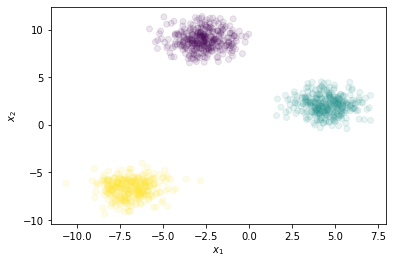

In [5]:
X_np, y_np = X.compute(), y.compute()
fig, ax = plt.subplots()
ax.scatter(X_np[:, 0], X_np[:, 1], c=y_np, alpha=0.1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

## **3. Preprocesamiento**
---

`dask_ml` tiene un módulo de `preprocesamiento` bastante similar a `sklearn`, por ejemplo, podemos usar un `StandardScaler`:

In [6]:
from dask_ml.preprocessing import StandardScaler
norm = StandardScaler().fit(X)
print(norm)

StandardScaler()


Podemos transformar los datos:

In [7]:
X_t = norm.transform(X)
print(X_t)

dask.array<truediv, shape=(1000, 2), dtype=float64, chunksize=(100, 2), chunktype=numpy.ndarray>


## **4. Validación Cruzada**
---

El módulo `model_selection` de `dask_ml` es bastante similar al de `sklearn`, por ejemplo la función `train_test_split`:

In [8]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X_t, y, test_size=0.3
        )

Nuevamente, todos los resultados son arreglos de `dask`:

In [9]:
print(X_train)

dask.array<concatenate, shape=(700, 2), dtype=float64, chunksize=(70, 2), chunktype=numpy.ndarray>


## **5. Modelamiento**
---

Tenemos distintas formas de usar modelos de forma distribuida en `dask_ml`, por un lado, los modelos internos:

In [10]:
from dask_ml.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
print(model)

LogisticRegression()


Como puede ver, el módulo `linear_model` es equivalente a `sklearn`, no obstante, podemos usar cualquier modelo de `sklearn` siempre que este tenga el método `partial_fit`, es decir, modelos que no requieren ver el conjunto de datos completo para su entrenamiento (únicamente algunas partes). En [este enlace](https://scikit-learn.org/0.15/modules/scaling_strategies.html) encuentra una descripción de qué modelos se pueden usar. Cualquiera de estos modelos se puede escalar con `dask_ml`. Veamos un ejemplo:

In [11]:
from sklearn.linear_model import SGDClassifier # Modelo a escalar
from dask_ml.wrappers import Incremental # Clase para escalar modelo
model = Incremental(SGDClassifier(random_state=0, max_iter=100))
print(model)

Incremental(estimator=SGDClassifier(max_iter=100, random_state=0))


En este caso, tenemos un nuevo modelo de `dask` que podemos usar como el modelo anterior, es decir, lo podemos entrenar con arreglos de `dask`, en este caso usamos `classes` para especificar los valores únicos que tienen las etiquetas (recuerde que el modelo no ve el conjunto de datos completo, entonces no lo puede saber de antemano).

In [12]:
model.fit(X_train, y_train, classes=[0, 1, 2])

Incremental(estimator=SGDClassifier(max_iter=100, random_state=0))

## **6. Evaluación**
---

`dask_ml` también tiene su paquete de métricas que permiten evaluarse sobre elementos de `dask` (algunas métricas no se pueden evaluar fácilmente, entonces es necesario hacerlo desde `sklearn`), primero, calculamos las predicciones:

In [13]:
y_pred = model.predict(X_test)
print(y_pred)

dask.array<_predict, shape=(300,), dtype=int64, chunksize=(30,), chunktype=numpy.ndarray>


Ahora, evaluamos el accuracy:

In [14]:
from dask_ml.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


Como pudimos ver, `dask_ml` es una alternativa bastante interesante para poder entrenar modelos con grandes cantidades de datos, también resulta ser bastante útil por su alta compatibilidad con `sklearn`.

## **7. Recursos Adicionales**
---

* [DaskML](https://ml.dask.org/).
* [Dask - Talks & tutorials](https://docs.dask.org/en/stable/presentations.html).

## **8. Créditos**
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Diseño, desarrollo del notebook y material audiovisual**

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*